# Taslima Akter, 3040384

In [1]:
#Install packages
import math
import copy
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss, accuracy_score, mean_squared_error, r2_score
from pprint import pprint
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale
from sklearn.feature_selection import SelectKBest, chi2, r_regression, SequentialFeatureSelector, RFE
from sklearn.linear_model import RidgeCV, LogisticRegression, LogisticRegressionCV, Ridge, Lasso, LinearRegression, LassoCV

# Loading Regression Data
Load appropriate dataset here

In [2]:
from sklearn.datasets import load_diabetes
diabetes_df =  load_diabetes(as_frame=True).frame
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
feature = np.array(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']])
target = np.array(diabetes_df["target"])
X=feature
y=target
X_y_df = pd.DataFrame(np.array(np.transpose([X[:,0],X[:,1],X[:,2],X[:,3],X[:,4],X[:,5],X[:,6],X[:,7],X[:,8],X[:,9], y])),
columns=["x_age", "x_sex", "x_bmi", "x_bp", "x_s1", "x_s2", "x_s3", "x_s4", "x_s5", "x_s6","y_target"])
X_y_df

,x_age,x_sex,x_bmi,x_bp,x_s1,x_s2,x_s3,x_s4,x_s5,x_s6,y_target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# Multivariate Linear Regression
(Split your dataset here)

In [4]:
#Spliting the dataset
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=0,shuffle=False)

## Feature selection
### Pearsons correlation
#### Correlation matrix
(Create coleration matrix here)

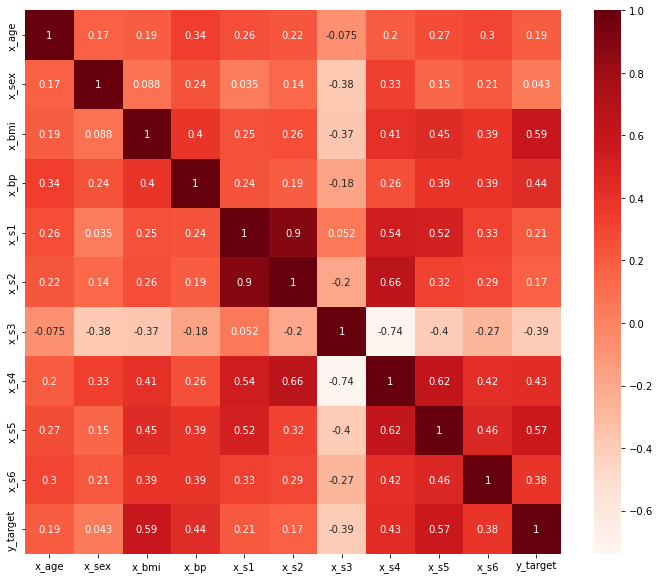

In [5]:
#plot correlation matrix for all features
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,10))
cor = X_y_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Use pearsons correlation to get the best 5 features. Get mse and rsquared on the testing set

In [6]:
#Use pearsons correlation to get the best 5 features from our dataset
#Use LinearRegression to train on the training set
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression

k_in = 5

training_set_x = x_train
training_set_y = y_train

testing_set_x = x_test
testing_set_y = y_test

selector = SelectKBest(r_regression, k=k_in).fit(training_set_x, training_set_y)
training_set_new = selector.transform(training_set_x)
testing_set_new = selector.transform(testing_set_x)

In [7]:
#Use LinearRegression to train on the training set 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(training_set_new, training_set_y)
h_w_x = reg.predict(testing_set_new)
#get mse and rsquared on the testing set
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 3146, r2: 0.5100859243647621


##### Show which 5 features were selected

In [8]:
import numpy as np
selector.scores_
top_n = np.argsort(selector.scores_)[-k_in:]
print(X_y_df.iloc[:, top_n].columns)

Index(['x_s6', 'x_bp', 'x_s4', 'x_s5', 'x_bmi'], dtype='object')


### Forward selection

#### Use forward selection to get best features with a tol of 0.01 for mean squared error (Calculate mse and rsquared)

In [9]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select="auto", scoring='neg_mean_squared_error', tol=0.01, direction='forward')
sfs.fit(training_set_x, training_set_y)
training_set_x_new1 = sfs.transform(training_set_x)
testing_set_x_new1 = sfs.transform(testing_set_x)

In [10]:
#Use LinearRegression to train on the training set 
h_w_x = reg.fit(training_set_x_new1, training_set_y).predict(testing_set_x_new1)
#get mse and rsquared on the testing set
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2957, r2: 0.5393933637112905


##### Show which features were selected

In [11]:
fs_indices = sfs.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x_sex', 'x_bmi', 'x_bp', 'x_s1', 'x_s4', 'x_s5'], dtype='object')


### Backward selection
#### Use backward selection to get best features with a tol of 0.01 for mean squared error (Calculate mse and rsquared)

In [12]:
reg = LinearRegression()
sfs = SequentialFeatureSelector(reg, n_features_to_select="auto", scoring='neg_mean_squared_error', tol=0.01, direction='backward')
sfs.fit(training_set_x, training_set_y)
training_set_x_new2 = sfs.transform(training_set_x)
testing_set_x_new2 = sfs.transform(testing_set_x)

In [13]:
#Use LinearRegression to train on the training set 
h_w_x = reg.fit(training_set_x_new2, training_set_y).predict(testing_set_x_new2)
#get mse and rsquared on the testing set
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2957, r2: 0.5393933637112905


#### Show which features were selected

In [14]:
fs_indices = sfs.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x_sex', 'x_bmi', 'x_bp', 'x_s1', 'x_s4', 'x_s5'], dtype='object')


### Recursive Feature Elimination
#### Use recursive feature elimination to get the best 5 features (Calculate mse and rsquared)

In [15]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector.fit(training_set_x, training_set_y)

training_set_x_new3 = selector.transform(training_set_x)
testing_set_x_new3= selector.transform(testing_set_x)

In [16]:
#Use LinearRegression to train on the training set 
h_w_x = reg.fit(training_set_x_new3, training_set_y).predict(testing_set_x_new3)
#get mse and rsquared on the testing set
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {math.floor(mse)}, r2: {r2}")

mse: 2993, r2: 0.5338084065896036


##### Show which features were selected

In [17]:
fs_indices = selector.get_support(True)
print(X_y_df.iloc[:, fs_indices].columns)

Index(['x_bmi', 'x_bp', 'x_s1', 'x_s2', 'x_s5'], dtype='object')


##### Show ranking of each feature in a dataframe

In [18]:
import pandas as pd

ranking_indices = selector.ranking_
pd.DataFrame(list(zip(X_y_df.columns,ranking_indices)), columns=["features","rank"]).sort_values(by='rank',ascending=True)

,features,rank
2,x_bmi,1
3,x_bp,1
4,x_s1,1
5,x_s2,1
8,x_s5,1
1,x_sex,2
7,x_s4,3
9,x_s6,4
6,x_s3,5
0,x_age,6


## Cross validation
### Use shufflesplit cross validation,
 - Use LinearRegression 
 - n_splits=4.
 - test size of 25%
  (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [19]:
from pprint import pprint
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg = LinearRegression().fit(X_train, y_train)
    h_w_x = reg.predict(X_test)
    mse = mean_squared_error(y_test, h_w_x)
    r2 = r2_score(y_test, h_w_x)
    print(f"mse: {math.floor(mse)}, r2: {r2}")
    

TRAIN: [ 20 353 281  14 300 240 175 405 153  75  64  55 135 329  81 316 369 328
 414 421 361 415 232 224 252 254 418 106 278  63 336 378 387 430  89  93
 245 272 241  92  18 145 150 322 393 297 231  66 380 412 140 101 345 247
 363  17 146 315 220  30 114 235 103 219 274 176 191 116 168 367 120 218
 112 303 136 308 221 126 196 332 424 133  33 419 162  34  44  97  85  61
 167 199 173 229 236 433 376 250 108 407  46 357 372 263  73 137 422 246
 253  29 181 374 301  51 365 391 217 432  27   2 259 156 255 417 346 138
 212 104 310 306 311 215 348 189 214  35 230 204 234 293 239 210  67  24
 295 216 223 129 111 166 349  40 317  79 431 350  13 364 436 228 161  83
 439 416 110 149 152  16 299 109 312 139 237 260 318 355 248 342  19 269
 226 340   3 309 125 280 286  77 184 354 420 275 294 384 182 395  80 307
 258  11 331  86 266  36 423  58  41 270  50 209 352 351 368 123 222  62
 379 130 187  23  43   0 201 377  98 304 429 178 256  94 409  95 390 169
  69 305  48 341 207 279 227 148 143 334 180

# Regularized Linear Regression
## Use RidgeCV class to find best aplha.(Calculate the mse and rsquared). Store and print best alpha found

In [20]:
#RidgeCV performs cross validaion using regularized linear regression to find the best alpha for our dataset
from sklearn.linear_model import RidgeCV
reg_cv = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(training_set_x, training_set_y)
alpha = reg_cv.alpha_
print(f"alpha: {alpha}")

alpha: 0.1


In [21]:
h_w_x = reg_cv.predict(testing_set_x)
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {mse}, r2: {r2}")

mse: 3021.6221988663083, r2: 0.5294720600450111


# Cross validation
### Use shufflesplit cross validation with:
    Ridge with the best alpha found,
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [22]:
rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    reg = Ridge(alpha=alpha).fit(X_train, y_train)    
    h_w_x = reg.predict(X_test)
    mse = mean_squared_error(y_test, h_w_x)
    r2 = r2_score(y_test, h_w_x)
    print(f"alpha:{alpha}, mse: {mse}, r2: {r2}")

TRAIN: [ 20 353 281  14 300 240 175 405 153  75  64  55 135 329  81 316 369 328
 414 421 361 415 232 224 252 254 418 106 278  63 336 378 387 430  89  93
 245 272 241  92  18 145 150 322 393 297 231  66 380 412 140 101 345 247
 363  17 146 315 220  30 114 235 103 219 274 176 191 116 168 367 120 218
 112 303 136 308 221 126 196 332 424 133  33 419 162  34  44  97  85  61
 167 199 173 229 236 433 376 250 108 407  46 357 372 263  73 137 422 246
 253  29 181 374 301  51 365 391 217 432  27   2 259 156 255 417 346 138
 212 104 310 306 311 215 348 189 214  35 230 204 234 293 239 210  67  24
 295 216 223 129 111 166 349  40 317  79 431 350  13 364 436 228 161  83
 439 416 110 149 152  16 299 109 312 139 237 260 318 355 248 342  19 269
 226 340   3 309 125 280 286  77 184 354 420 275 294 384 182 395  80 307
 258  11 331  86 266  36 423  58  41 270  50 209 352 351 368 123 222  62
 379 130 187  23  43   0 201 377  98 304 429 178 256  94 409  95 390 169
  69 305  48 341 207 279 227 148 143 334 180

### Use shufflesplit cross validation with:
    RidgeCV with the alphas [0.001, 0.01, 0.1, 1],
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set
    Print the alpha picked after every calculation

In [23]:
rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    reg_cv = RidgeCV(alphas=[0.001, 0.01, 0.1, 1]).fit(X_train, y_train)
    alpha = reg_cv.alpha_
    h_w_x = reg_cv.predict(X_test)
    mse = mean_squared_error(y_test, h_w_x)
    r2 = r2_score(y_test, h_w_x)
    print(f"alpha: {alpha}, mse: {mse}, r2: {r2}")

TRAIN: [ 20 353 281  14 300 240 175 405 153  75  64  55 135 329  81 316 369 328
 414 421 361 415 232 224 252 254 418 106 278  63 336 378 387 430  89  93
 245 272 241  92  18 145 150 322 393 297 231  66 380 412 140 101 345 247
 363  17 146 315 220  30 114 235 103 219 274 176 191 116 168 367 120 218
 112 303 136 308 221 126 196 332 424 133  33 419 162  34  44  97  85  61
 167 199 173 229 236 433 376 250 108 407  46 357 372 263  73 137 422 246
 253  29 181 374 301  51 365 391 217 432  27   2 259 156 255 417 346 138
 212 104 310 306 311 215 348 189 214  35 230 204 234 293 239 210  67  24
 295 216 223 129 111 166 349  40 317  79 431 350  13 364 436 228 161  83
 439 416 110 149 152  16 299 109 312 139 237 260 318 355 248 342  19 269
 226 340   3 309 125 280 286  77 184 354 420 275 294 384 182 395  80 307
 258  11 331  86 266  36 423  58  41 270  50 209 352 351 368 123 222  62
 379 130 187  23  43   0 201 377  98 304 429 178 256  94 409  95 390 169
  69 305  48 341 207 279 227 148 143 334 180

## Learning Curves
### Plot your training mse and testing mse over increasing examples

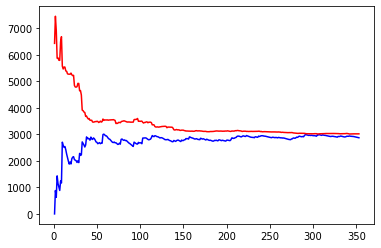

In [24]:
holder_m_mse_train = {}
holder_m_mse_test = {}
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
for i in range(1, len(training_set_x)+1):
    if i == 1:
        reg_cv = Ridge(alpha=alpha).fit(training_set_x[:i,:].reshape(1, -1), training_set_y[:i])
        train_mse = mean_squared_error(training_set_y[:i].reshape(1, -1), reg_cv.predict(training_set_x[:i,:].reshape(1, -1)))
        test_mse = mean_squared_error(testing_set_y, reg_cv.predict(testing_set_x))

    else:
        reg_cv = Ridge(alpha=alpha).fit(training_set_x[:i,:], training_set_y[:i])
        train_mse = mean_squared_error(training_set_y[:i], reg_cv.predict(training_set_x[:i,:]))
        test_mse = mean_squared_error(testing_set_y, reg_cv.predict(testing_set_x))
        
    holder_m_mse_train[i] = train_mse
    holder_m_mse_test[i] = test_mse

lists_train = sorted(holder_m_mse_train.items()) # sorted by key, return a list of tuples
lists_test = sorted(holder_m_mse_test.items())

x_train, y_train = zip(*lists_train) # unpack a list of pairs into two tuples
x_test, y_test = zip(*lists_test)

plt.plot(x_train, y_train, color="blue")
plt.plot(x_test, y_test, color="red")
plt.show()

# Lasso
## Use LassoCV class to find best aplha.(Calculate the mse and rsquared). Store and Print best alpha found

In [25]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1]).fit(training_set_x, training_set_y)
lasso_cv.predict(testing_set_x)

array([184.85004695, 206.2168507 , 131.24027684, 101.55555757,
       199.8018753 ,  60.67634098, 169.26573048, 185.75504745,
       119.42174277, 223.99690735, 157.47597208, 156.48169141,
       158.09674622, 253.73252904, 254.09365741, 199.77526913,
       177.93400665,  66.93087885, 211.66343981, 114.97897495,
       135.62494374, 123.24211203, 175.64508857, 214.44259865,
       166.86606061, 163.78354135, 124.06859139, 166.18539127,
        80.50979759, 249.70327575, 117.97682684, 127.72297565,
       134.63879878, 109.32145027, 102.71988864, 161.18448725,
        89.26366945, 258.09605623,  61.44188668, 106.88171852,
       103.11788613, 264.04761928, 164.03466323,  72.46698582,
       174.41383462, 176.96950435, 189.79435544, 172.76231694,
        89.75411519, 144.30776916, 244.71937047, 189.70603481,
       262.67467291,  58.79790533, 175.89401958, 193.51110647,
       171.77041346, 166.37440375, 151.28839245, 220.72725384,
       124.91149354, 174.71607915, 166.91245003, 214.49

In [26]:
alpha = lasso_cv.alpha_
print("Best alpha: ", alpha)

Best alpha:  0.1


In [27]:
#Calculate the mse and rsquared on the testing sets
lasso= Lasso(alpha=alpha).fit(training_set_x, training_set_y)
h_w_x =lasso.predict(testing_set_x)
 
mse = mean_squared_error(testing_set_y, h_w_x)
r2 = r2_score(testing_set_y, h_w_x)
print(f"mse: {mse}, r2: {r2}")

mse: 3020.901237350059, r2: 0.529584328394494


### Figure out which features were selected by Lasso

In [28]:
lasso_indices = np.nonzero(lasso_cv.coef_)
print(X_y_df.iloc[:, lasso_indices[0]].columns)
lasso_indices[0]

Index(['x_sex', 'x_bmi', 'x_bp', 'x_s2', 'x_s3', 'x_s5', 'x_s6'], dtype='object')


array([1, 2, 3, 5, 6, 8, 9], dtype=int64)

### Use shufflesplit cross validation with:
    regular Lasso with the best alpaha you got,
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set

In [29]:
from sklearn.linear_model import Lasso

rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso= Lasso(alpha=alpha).fit(X_train, y_train)
    h_w_x = lasso.predict(X_test)
    mse = mean_squared_error(y_test, h_w_x)
    r2 = r2_score(y_test, h_w_x)
    print(f"alpha: {alpha}, mse: {mse}, r2: {r2}")

TRAIN: [ 20 353 281  14 300 240 175 405 153  75  64  55 135 329  81 316 369 328
 414 421 361 415 232 224 252 254 418 106 278  63 336 378 387 430  89  93
 245 272 241  92  18 145 150 322 393 297 231  66 380 412 140 101 345 247
 363  17 146 315 220  30 114 235 103 219 274 176 191 116 168 367 120 218
 112 303 136 308 221 126 196 332 424 133  33 419 162  34  44  97  85  61
 167 199 173 229 236 433 376 250 108 407  46 357 372 263  73 137 422 246
 253  29 181 374 301  51 365 391 217 432  27   2 259 156 255 417 346 138
 212 104 310 306 311 215 348 189 214  35 230 204 234 293 239 210  67  24
 295 216 223 129 111 166 349  40 317  79 431 350  13 364 436 228 161  83
 439 416 110 149 152  16 299 109 312 139 237 260 318 355 248 342  19 269
 226 340   3 309 125 280 286  77 184 354 420 275 294 384 182 395  80 307
 258  11 331  86 266  36 423  58  41 270  50 209 352 351 368 123 222  62
 379 130 187  23  43   0 201 377  98 304 429 178 256  94 409  95 390 169
  69 305  48 341 207 279 227 148 143 334 180

### Use shufflesplit cross validation with:
    LassoCV with the alphas [0.001, 0.01, 0.1, 1],
    n_splits=4.
    test set size 0f 25%
    (Calculate mse and rsquared for your testing sets). Write this in a for loop and print out your results for each test set
    Print the alpha picked after every calculation

In [30]:
from sklearn.linear_model import LassoCV
rs = ShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lasso_cv= LassoCV(alphas=[0.001, 0.01, 0.1, 1]).fit(X_train, y_train)
    alpha = lasso_cv.alpha_
    h_w_x = lasso_cv.predict(X_test)
    mse = mean_squared_error(y_test, h_w_x)
    r2 = r2_score(y_test, h_w_x)
    print(f"alpha: {alpha}, mse: {mse}, r2: {r2}")

TRAIN: [ 20 353 281  14 300 240 175 405 153  75  64  55 135 329  81 316 369 328
 414 421 361 415 232 224 252 254 418 106 278  63 336 378 387 430  89  93
 245 272 241  92  18 145 150 322 393 297 231  66 380 412 140 101 345 247
 363  17 146 315 220  30 114 235 103 219 274 176 191 116 168 367 120 218
 112 303 136 308 221 126 196 332 424 133  33 419 162  34  44  97  85  61
 167 199 173 229 236 433 376 250 108 407  46 357 372 263  73 137 422 246
 253  29 181 374 301  51 365 391 217 432  27   2 259 156 255 417 346 138
 212 104 310 306 311 215 348 189 214  35 230 204 234 293 239 210  67  24
 295 216 223 129 111 166 349  40 317  79 431 350  13 364 436 228 161  83
 439 416 110 149 152  16 299 109 312 139 237 260 318 355 248 342  19 269
 226 340   3 309 125 280 286  77 184 354 420 275 294 384 182 395  80 307
 258  11 331  86 266  36 423  58  41 270  50 209 352 351 368 123 222  62
 379 130 187  23  43   0 201 377  98 304 429 178 256  94 409  95 390 169
  69 305  48 341 207 279 227 148 143 334 180

# Load Classification Data
(Load appropriate dataset here)

In [31]:
from sklearn.datasets import load_iris
iris_df =  load_iris(as_frame=True).frame
#Copy the dataset
iris_df_copy = copy.deepcopy(iris_df)

In [32]:
# Shuffle data
iris_df_copy = iris_df.sample(frac=1, random_state=0).reset_index(drop=True)

# Multinomial Logistic Regression
(split your data into a train and test set here)

In [37]:
feature1 = np.array(iris_df_copy[["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"]])

X1 = feature1
Y1 = iris_df_copy["target"]

In [38]:
#Spliting the dataset
#x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=.2, random_state=0,shuffle=False)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, test_size=.2)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
clf=classifier.fit(x_train1, y_train1)
#y_pred = classifier.predict(x_test1)

In [41]:
#Extra
h_w_x = clf.predict(x_test1)
log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.06988490031942778, accuracy: 0.9666666666666667


In [42]:
error = []

# Calculating MSE error for K values between 1 and 39
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    clf=classifier.fit(x_train1, y_train1)
    h_w_x = clf.predict(x_test1)
    log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
    #mse = mean_squared_error(y_test, y_pred)
    error.append(log_loss_g)
    print(f'K-value: {i}, log_loss_g: {log_loss_g}')

K-value: 1, log_loss_g: 0.06988490031942778
K-value: 2, log_loss_g: 0.06988490031942778
K-value: 3, log_loss_g: 0.06988490031942778
K-value: 4, log_loss_g: 0.06988490031942778
K-value: 5, log_loss_g: 0.06988490031942778
K-value: 6, log_loss_g: 0.06988490031942778
K-value: 7, log_loss_g: 0.06988490031942778
K-value: 8, log_loss_g: 0.06988490031942778
K-value: 9, log_loss_g: 0.06988490031942778
K-value: 10, log_loss_g: 0.06988490031942778
K-value: 11, log_loss_g: 0.06988490031942778
K-value: 12, log_loss_g: 0.06988490031942778
K-value: 13, log_loss_g: 0.06988490031942778
K-value: 14, log_loss_g: 0.06988490031942778
K-value: 15, log_loss_g: 0.06988490031942778
K-value: 16, log_loss_g: 0.06988490031942778
K-value: 17, log_loss_g: 0.06988490031942778
K-value: 18, log_loss_g: 0.06988490031942778
K-value: 19, log_loss_g: 0.06988490031942778
K-value: 20, log_loss_g: 0.06988490031942778
K-value: 21, log_loss_g: 0.06988490031942778
K-value: 22, log_loss_g: 0.06988490031942778
K-value: 23, log_lo

# Feature scaling
(feature scale your data here)

In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
training_set_x = x_train1
training_set_y = y_train1

testing_set_x = x_test1
testing_set_y = y_test1

scaler.fit(training_set_x)
training_set_x_fs = scaler.transform(training_set_x)
testing_set_x_fs = scaler.transform(testing_set_x)

# Scaling full dataset of features(training and testing together)
all_scaled = scaler.transform(X1)

## Feature Selection
### Use chisquare feature_selection to select the best 2 features to use (Calculate the log_loss and accuracy)

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

k_in=2
selector = SelectKBest(chi2, k=k_in).fit(training_set_x_fs, training_set_y)
training_set_x_fs_new = selector.transform(training_set_x_fs)
testing_set_x_fs_new = selector.transform(testing_set_x_fs)

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(random_state=0, solver='lbfgs', penalty='none').fit(training_set_x_fs_new, training_set_y)

In [38]:
h_w_x = clf.predict(testing_set_x_fs_new)
log_loss_g = log_loss(testing_set_y, clf.predict_proba(testing_set_x_fs_new))
accuracy = accuracy_score(testing_set_y, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.23117282073692727, accuracy: 0.9333333333333333


#### Show which features were selected

In [39]:
import numpy as np

selector.scores_
top_n = np.argsort(selector.scores_)[-k_in:]
print(iris_df_copy.iloc[:, top_n].columns)

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


### Use forward selection to get best features with a tol of 0.1 for accuracy (Calculate the log_loss and accuracy)

In [40]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", scoring='accuracy', tol=0.1, direction='forward')
sfs.fit(training_set_x_fs, training_set_y)
training_set_x_fs_new = sfs.transform(training_set_x_fs)
testing_set_x_fs_new = sfs.transform(testing_set_x_fs)
clf.fit(training_set_x_fs_new,training_set_y)

LogisticRegression(penalty='none', random_state=0)

In [41]:
h_w_x = clf.predict(testing_set_x_fs_new)
log_loss_g = log_loss(testing_set_y, clf.predict_proba(testing_set_x_fs_new))
accuracy = accuracy_score(testing_set_y, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.3120968372247698, accuracy: 0.8666666666666667


#### Show which features were selected

In [42]:
fs_indices = sfs.get_support(True)
print(iris_df_copy.iloc[:, fs_indices].columns)

Index(['petal length (cm)'], dtype='object')


### Use backward selection to get best features with a tol of 0.1 for accuracy (Calculate the log_loss and accuracy)

In [43]:
clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
sfs = SequentialFeatureSelector(clf, n_features_to_select="auto", scoring='accuracy', tol=0.1, direction='backward')
sfs.fit(training_set_x_fs, training_set_y)
training_set_x_fs_new = sfs.transform(training_set_x_fs)
testing_set_x_fs_new = sfs.transform(testing_set_x_fs)
clf.fit(training_set_x_fs_new,training_set_y)

LogisticRegression(penalty='none', random_state=0)

In [44]:
h_w_x = clf.predict(testing_set_x_fs_new)
log_loss_g = log_loss(testing_set_y, clf.predict_proba(testing_set_x_fs_new))
accuracy = accuracy_score(testing_set_y, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.2112700819904662, accuracy: 0.8666666666666667


#### Show which features were selected

In [45]:
fs_indices = sfs.get_support(True)
print(iris_df_copy.iloc[:, fs_indices].columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)'], dtype='object')


### Recursive Feature Elimination
#### Use recursive feature elimination to get the best 2 features (Calculate the log_loss and accuracy)

In [46]:
from sklearn.feature_selection import RFE
k_number_features = 2

estimator = LogisticRegression(random_state=0, solver='lbfgs',penalty='none')
selector = RFE(estimator, n_features_to_select=2, step=1)
selector.fit(training_set_x_fs, training_set_y)

training_set_x_fs_new = selector.transform(training_set_x_fs)
testing_set_x_fs_new = selector.transform(testing_set_x_fs)
estimator.fit(training_set_x_fs_new, training_set_y)

LogisticRegression(penalty='none', random_state=0)

#### Show which features were selected

In [47]:
h_w_x = estimator.predict(testing_set_x_fs_new)
log_loss_g = log_loss(testing_set_y, estimator.predict_proba(testing_set_x_fs_new))
accuracy = accuracy_score(testing_set_y, h_w_x, normalize=True)
print(f"log_loss: {log_loss_g}, accuracy: {accuracy}")

log_loss: 0.23117282073692727, accuracy: 0.9333333333333333


# Show which features were selected

In [48]:
fs_indices = selector.get_support(True)
print(iris_df_copy.iloc[:, fs_indices].columns)

Index(['petal length (cm)', 'petal width (cm)'], dtype='object')


##### Show ranking of each feature in a dataframe

In [49]:
import pandas as pd

ranking_indices = selector.ranking_
pd.DataFrame(list(zip(iris_df_copy.columns,ranking_indices)), columns=["features","rank"]).sort_values(ascending=True,by='rank')

,features,rank
2,petal length (cm),1
3,petal width (cm),1
1,sepal width (cm),2
0,sepal length (cm),3


## Cross validation
### Use StratifiedShuffleSplit cross validation:
    Use LogisticRegression,
    n_splits=4.
    test set size of 25%
    (Calculate log_loss and accuracy for your testing sets). Write this in a for loop and print out your results for each test set

In [50]:
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import log_loss
sss = StratifiedShuffleSplit(n_splits=4, test_size=.25, random_state=0)

for train_index, test_index in sss.split(all_scaled, Y1):
    print("TRAIN:", train_index, '\n',"TEST:", test_index)
    x_train1, x_test1 = all_scaled[train_index], all_scaled[test_index]
    y_train1, y_test1 = Y1[train_index], Y1[test_index]
    clf = LogisticRegression(random_state=0, solver='lbfgs', penalty='none')
    clf.fit(x_train1, y_train1)
    h_w_x = clf.predict(x_test1)
    accuracy = accuracy_score(y_test1, h_w_x, normalize=True)
    log_loss_g = log_loss(y_test1, clf.predict_proba(x_test1))
    print(f"Accuracy:{accuracy}, Log_loss_g:{log_loss_g}")
    

TRAIN: [ 21   4  25 133  30 136 115 120  60 125  43  50  96  49  91  35 102  64
  63  92  55  74 101  84  67  83  98 132 141  59   3  33  65 113  18  57
  85  14  16 119  56 134  32 108  73   8  90  29  69  47   9  24  17  44
  99 107 122  42 100  71  52 140  54 106  27 139 111  77  34  58   5 105
  31  51 114  66 130  41 142  88  68  70  13 126  93 149 138  19  23 135
  76 146  80  78  94   6  20 123 129  53  81  28  61 131 104 144  45  38
  97  89 121  46] 
 TEST: [118  36 145  82  79  12 147  26 109  86   0  62  39  10 127  75  15 137
  72   7 148 117 112   2  95 110  87 128 124  37 143  11 116  48  22   1
 103  40]
Accuracy:0.9736842105263158, Log_loss_g:0.9089151682871249
TRAIN: [112  52  74  59  54  10 130  85  35  29  98 142  28 144   3 114 134  95
  73 149 132  43 116 115 117 131  76 126  23 111 148 146  19  88  80 118
  46  71  79 106  32  50  83  36 104 101 143  63   5 100 137  64 102  27
  97  39 105  16  96  44  82  75 145  41  92   6 135  53   9  37  21  31
 113  51  24 14

# Regularized Logistic Regression
## Use LogisticRegressionCV class to find best aplha for each class.(Calculate the log_loss and accuracy). print best alpha found for each class

        - Find what it proposed was the best alpha per class and use that to get accuracy and log_loss on the testing set
         - Store and print best alpha found per class

### Use StratifiedShuffleSplit cross validation:
    LogisticRegressionCV with the best alpha found,
    n_splits=4.
    test set size 0f 25%
    (Calculate log_loss and accuracy for your testing sets). Write this in a for loop and print out your results for each test set

In [51]:
#from sklearn.metrics import MinMaxScaler
scaler = MinMaxScaler()
training_set_x = x_train1
training_set_y = y_train1
testing_set_x = x_test1
testing_set_y = y_test1
scaler.fit(training_set_x)
        
training_set_x_fs = scaler.transform(training_set_x)
testing_set_x_fs = scaler.transform(testing_set_x)
all_scaled = scaler.transform(X1)


In [52]:
from sklearn.linear_model import LogisticRegressionCV
clf_cv = LogisticRegressionCV(Cs=[1e-3, 1e-2, 1e-1, 1], random_state=0, solver='lbfgs', penalty='l2').fit(training_set_x_fs, training_set_y)
alpha_per_class = clf_cv.C_
alpha_per_class

array([1., 1., 1.])

In [53]:
#predict testing value
predict_test = clf_cv.predict(testing_set_x_fs)

In [54]:
accuracy = accuracy_score(testing_set_y, predict_test, normalize=True)
log_loss_g = log_loss(testing_set_y, clf_cv.predict_proba(testing_set_x_fs))
print(f"Accuracy:{accuracy}, Log_loss_g:{log_loss_g}")

Accuracy:0.9210526315789473, Log_loss_g:0.3924494264850218


In [55]:
import math
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss
sss = StratifiedShuffleSplit(n_splits=4, test_size=.25, random_state=0)


for train_index, test_index in sss.split(all_scaled, Y1):
    print("TRAIN:", train_index,'\n', "TEST:", test_index)
    x_train1, x_test1 = all_scaled[train_index], all_scaled[test_index]
    y_train1, y_test1 = Y1[train_index], Y1[test_index]
    scaler = MinMaxScaler()
    training_set_x = x_train1
    training_set_y = y_train1
    testing_set_x = x_test1
    testing_set_y = y_test1
    
    scaler.fit(training_set_x)
    
    training_set_x_fs = scaler.transform(training_set_x)
    testing_set_x_fs = scaler.transform(testing_set_x)
    clf_cv = LogisticRegressionCV(Cs=[1e-3, 1e-2, 1e-1, 1], random_state=0, solver='lbfgs', penalty='l2').fit(training_set_x_fs, training_set_y)
    alpha_per_class = clf_cv.C_
    clf_cv = LogisticRegressionCV(Cs=alpha_per_class, random_state=0, solver='lbfgs', penalty='l2').fit(training_set_x_fs, training_set_y)
    alpha_per_class = clf_cv.C_
    predict_test = clf_cv.predict(testing_set_x_fs)

    accuracy = accuracy_score(testing_set_y, predict_test, normalize=True)
    log_loss_g = log_loss(testing_set_y, clf_cv.predict_proba(testing_set_x_fs))
    print(f"Accuracy:{accuracy}, Log_loss_g:{log_loss_g}")
    


TRAIN: [ 21   4  25 133  30 136 115 120  60 125  43  50  96  49  91  35 102  64
  63  92  55  74 101  84  67  83  98 132 141  59   3  33  65 113  18  57
  85  14  16 119  56 134  32 108  73   8  90  29  69  47   9  24  17  44
  99 107 122  42 100  71  52 140  54 106  27 139 111  77  34  58   5 105
  31  51 114  66 130  41 142  88  68  70  13 126  93 149 138  19  23 135
  76 146  80  78  94   6  20 123 129  53  81  28  61 131 104 144  45  38
  97  89 121  46] 
 TEST: [118  36 145  82  79  12 147  26 109  86   0  62  39  10 127  75  15 137
  72   7 148 117 112   2  95 110  87 128 124  37 143  11 116  48  22   1
 103  40]
Accuracy:0.8947368421052632, Log_loss_g:0.3876951167150097
TRAIN: [112  52  74  59  54  10 130  85  35  29  98 142  28 144   3 114 134  95
  73 149 132  43 116 115 117 131  76 126  23 111 148 146  19  88  80 118
  46  71  79 106  32  50  83  36 104 101 143  63   5 100 137  64 102  27
  97  39 105  16  96  44  82  75 145  41  92   6 135  53   9  37  21  31
 113  51  24 14